# DOWNLOAD DATASET: 

In [2]:
!pip install numpy pandas opendatasets scikit-learn xgboost --quiet

In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [6]:
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  adityadutta200021


Your Kaggle Key:

  ········


100%|██████████| 1.56G/1.56G [01:13<00:00, 22.8MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction
CPU times: total: 21.7 s
Wall time: 1min 59s


In [7]:
data_dir = './new-york-city-taxi-fare-prediction'

In [19]:
import os
os.listdir(data_dir)

['GCP-Coupons-Instructions.rtf',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

# LOAD TRAINING SET:

In [26]:
import pandas as pd
import random

In [27]:
sample_frac = 0.01

In [28]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [29]:
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'float32'
}

In [30]:
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

In [32]:
random.seed(42)
df = pd.read_csv(data_dir + '/train.csv', usecols = selected_cols, dtype = dtypes,parse_dates=['pickup_datetime'], skiprows = skip_row )

In [33]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1.0


# LOAD TEST SET:

In [34]:
test_df = pd.read_csv(data_dir + '/test.csv', dtype = dtypes,parse_dates=['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


# EXPLORE DATASET: 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(6)
memory usage: 16.9 MB


In [36]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.341986
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [37]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(5), object(1)
memory usage: 348.7+ KB


In [39]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278756
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [40]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

# PREPARE DATASET:

# SPLIT TRAINING AND VALIDATION SET:

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
train_df,val_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [45]:
len(train_df), len(val_df)

(441960, 110490)

# FILL / REMOVE MISSING VALUES:

In [176]:
train_df = train_df.dropna()
val_df = val_df.dropna()

# EXTRACT INPUTS AND OUTPUTS:

In [47]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [48]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = 'fare_amount'

# TRAINING:

In [49]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

# VALIDATION:

In [50]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

# TEST:

In [52]:
test_inputs = test_df[input_cols]


# TRAINING HARDCODED AND BASELINE MODELS

# HARDCODED MODEL:

In [54]:
import numpy as np

In [55]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [56]:
mean_model = MeanRegressor()

In [57]:
mean_model.fit(train_inputs, train_targets)

In [58]:
mean_model.mean

11.354714

In [60]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [61]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [62]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error


In [64]:
def rmse(targets, preds):
    return root_mean_squared_error(targets,preds)

In [68]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

9.789782

In [69]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.899954

# BASELINE MODEL:

In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
linreg_model = LinearRegression()

In [73]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [76]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.546237, 11.28461 , 11.28414 , ..., 11.458918, 11.284281,
       11.284448], dtype=float32)

In [77]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [78]:
rmse(train_preds, train_targets)

9.788632

In [80]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.284328 , 11.284496 , 11.2847805, ..., 11.8045   , 11.284433 ,
       11.284133 ], dtype=float32)

In [81]:
rmse(val_preds, val_targets)

9.898088

# MAKE PREDICTIONS AND SUBMIT TO KAGGLE:

In [82]:
test_preds = linreg_model.predict(test_inputs)
test_preds

array([11.28428  , 11.284634 , 11.284384 , ..., 11.721249 , 11.7207985,
       11.720594 ], dtype=float32)

In [84]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [85]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [86]:
generate_submission(test_preds, 'linreg_submission.csv')

# FEATURE ENGINEERING:

# EXTRACT PARTS OF DATE:

In [87]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [89]:
add_dateparts(train_df,'pickup_datetime')

In [90]:
add_dateparts(val_df,'pickup_datetime')

In [91]:
add_dateparts(test_df,'pickup_datetime')

In [92]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1.0,2011,2,17,3,18


# ADD DISTANCE BETWEEN PICKUP AND DROP:

In [93]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [94]:
def add_trip_distance (df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                       df['pickup_latitude'],
                                       df['dropoff_longitude'],
                                       df['dropoff_latitude'])


In [95]:
add_trip_distance(train_df)

In [96]:
add_trip_distance(val_df)

In [97]:
add_trip_distance(test_df)

In [98]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1.0,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1.0,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1.0,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2.0,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1.0,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2.0,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3.0,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1.0,2011,2,17,3,18,2.146101


# ADD DISTANCE FROM POPULAR LANDMARKS:

In [99]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [100]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [101]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: total: 78.1 ms
Wall time: 109 ms


In [102]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1.0,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1.0,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1.0,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2.0,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1.0,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2.0,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3.0,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1.0,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


# REMOVE OUTLIERS AND INVALID DATA:

In [103]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [123]:
train_df = remove_outliers(train_df)
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1.0,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1.0,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1.0,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2.0,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1.0,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2.0,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3.0,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1.0,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


In [124]:
val_df = remove_outliers(val_df)
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1.0,2015,5,19,1,9,2.909793,19.740025,9.383803,17.790024,4.565639,4.238884
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1.0,2010,4,10,5,15,1.433791,20.677670,9.058475,18.058867,3.316964,5.146432
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1.0,2009,7,25,5,14,20.132486,0.968338,16.217609,32.993080,20.916292,20.150650
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1.0,2011,11,11,4,19,16.152088,17.243528,12.700686,17.041767,9.943375,4.032990
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2.0,2015,3,9,0,18,1.799553,21.676977,10.318309,16.832249,4.013190,4.468960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506435,3.700000,2010-05-30 10:44:30+00:00,-73.959457,40.774727,-73.966301,40.772179,1.0,2010,5,30,6,10,0.641764,21.514425,7.784740,19.794155,0.843463,7.570518
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3.0,2010,4,3,5,20,1.764959,21.099281,9.680783,17.443117,3.681154,4.718924
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1.0,2010,4,26,0,0,2.751241,20.154758,10.699293,16.551817,5.688355,2.891594
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1.0,2011,7,7,3,16,9.176848,16.786745,0.312350,27.113701,7.646412,13.441156


# SAVE INTERMEDIATE DATAFRAMES: 

In [125]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet')

# SPLIT INPUTS AND TARGETS:

In [126]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [127]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [128]:
target_col = ['fare_amount']

In [129]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [130]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [131]:
test_inputs = test_df[input_cols]

In [132]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

In [133]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

# RIDGE REGRESSION:

In [177]:
from sklearn.linear_model import Ridge

In [178]:
model1 = Ridge(random_state = 42)

In [179]:
model1.fit(train_inputs,train_targets)

Ridge(random_state=42)

In [180]:
evaluate(model1)

(5.049315152711231,
 5.217865657340075,
 array([[ 8.12925918],
        [ 4.11578439],
        [ 8.75063014],
        ...,
        [10.47234932],
        [ 8.2305928 ],
        [10.58672774]]),
 array([[10.91955339],
        [ 6.20493172],
        [46.21787888],
        ...,
        [ 8.0463052 ],
        [25.56885585],
        [ 8.45342102]]))

In [181]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.082151
1,2015-01-27 13:08:24.0000003,11.399499
2,2011-10-08 11:53:44.0000002,5.356923
3,2012-12-01 21:12:12.0000002,8.763571
4,2012-12-01 21:12:12.0000003,14.609918
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024995
9910,2015-01-12 17:05:51.0000001,11.218598
9911,2015-04-19 20:44:15.0000001,47.926481
9912,2015-01-31 01:05:19.0000005,22.600022


# RANDOM FOREST REGRESSOR:

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
model2 = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 10, n_estimators = 50)

In [143]:
model2.fit(train_inputs, train_targets)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [144]:
evaluate(model2)

(3.6022913838561528,
 4.167257655248953,
 array([ 7.06907907,  9.09651906,  9.09834234, ..., 10.39574834,
         7.73362485, 10.36404777]),
 array([12.53923917,  6.14414213, 47.3274893 , ...,  8.32839336,
        29.20883778,  8.27729971]))

In [145]:
predict_and_submit(model2,'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.522156
1,2015-01-27 13:08:24.0000003,10.499965
2,2011-10-08 11:53:44.0000002,5.049496
3,2012-12-01 21:12:12.0000002,8.486169
4,2012-12-01 21:12:12.0000003,14.316837
...,...,...
9909,2015-05-10 12:37:51.0000002,8.873896
9910,2015-01-12 17:05:51.0000001,12.551152
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.518925


# GRADIENT BOOSTING:

In [146]:
from xgboost import XGBRegressor

In [147]:
model3 = XGBRegressor(random_state = 42, objective = 'reg:squarederror')

In [149]:
model3.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [150]:
evaluate(model3)

(3.166428,
 3.9793801,
 array([ 6.653713 ,  8.931815 , 10.276588 , ..., 12.1582575,  9.564414 ,
         9.845059 ], dtype=float32),
 array([14.876896 ,  5.986584 , 47.171738 , ...,  7.5201406, 30.39466  ,
         8.515031 ], dtype=float32))

In [151]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.819051
1,2015-01-27 13:08:24.0000003,11.724770
2,2011-10-08 11:53:44.0000002,4.443203
3,2012-12-01 21:12:12.0000002,9.096115
4,2012-12-01 21:12:12.0000003,16.050816
...,...,...
9909,2015-05-10 12:37:51.0000002,9.119739
9910,2015-01-12 17:05:51.0000001,11.764132
9911,2015-04-19 20:44:15.0000001,53.424809
9912,2015-01-31 01:05:19.0000005,18.867956


# TUNE HYPERPARAMETERS:

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [159]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'}

# NO. OF TREES:

CPU times: total: 41.7 s
Wall time: 6.89 s


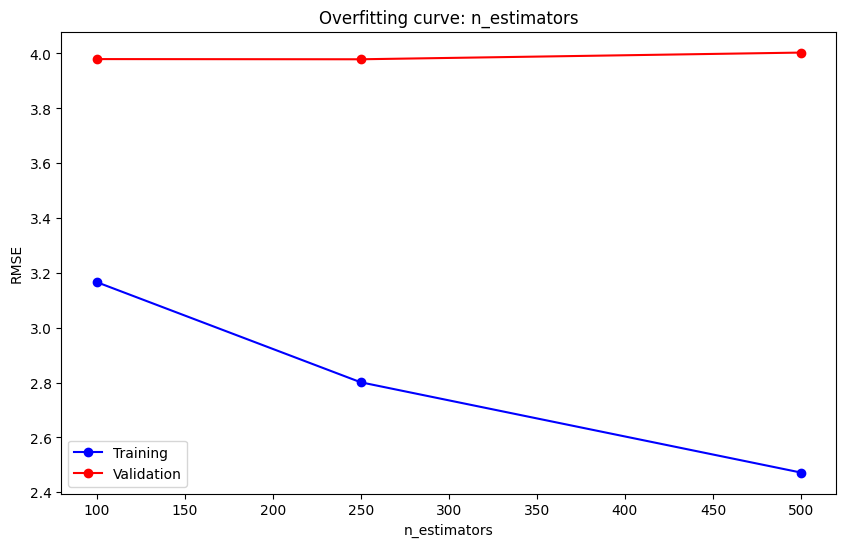

In [160]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [161]:
best_params['n_estimators'] = 250

# MAX_DEPTH :

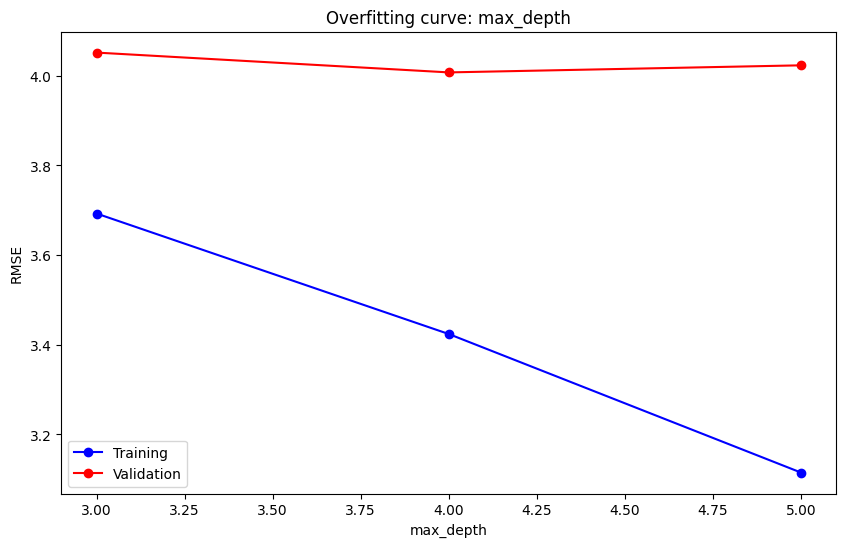

In [163]:
test_param_and_plot(XGBRegressor,'max_depth',[3,4,5], **best_params)

In [165]:
best_params['max_depth'] = 5

# LEARNING_RATE:

CPU times: total: 42.1 s
Wall time: 6.35 s


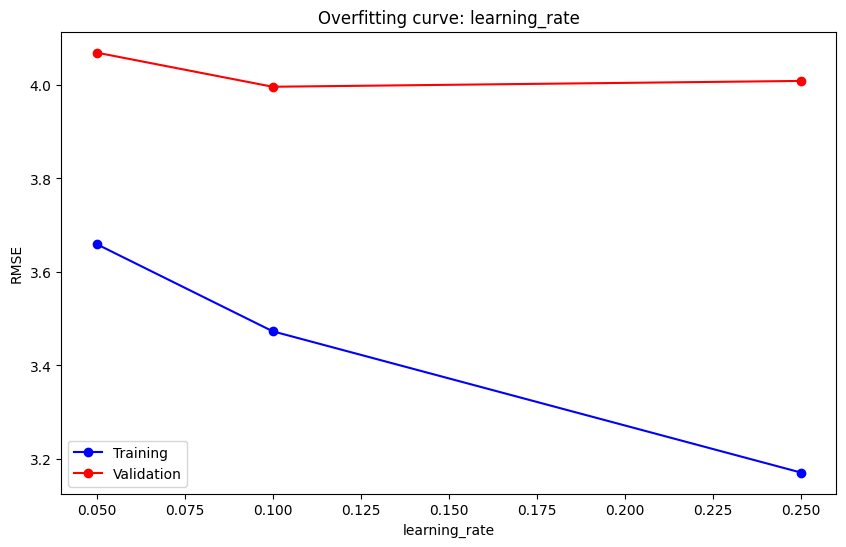

In [167]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [168]:
best_params['learning_rate'] = 0.25

In [169]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [170]:
xgb_model_final.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [182]:
evaluate(xgb_model_final)

(3.2074616,
 3.9877155,
 array([ 6.3942747,  8.156118 ,  9.941316 , ..., 11.766499 ,  9.200898 ,
        10.145953 ], dtype=float32),
 array([14.554565 ,  5.795544 , 48.046738 , ...,  7.6102695, 30.916338 ,
         8.5561   ], dtype=float32))

In [173]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.849108
1,2015-01-27 13:08:24.0000003,10.850513
2,2011-10-08 11:53:44.0000002,4.986358
3,2012-12-01 21:12:12.0000002,8.618697
4,2012-12-01 21:12:12.0000003,15.675056
...,...,...
9909,2015-05-10 12:37:51.0000002,8.669248
9910,2015-01-12 17:05:51.0000001,11.662894
9911,2015-04-19 20:44:15.0000001,53.927334
9912,2015-01-31 01:05:19.0000005,19.240555


In [174]:
from IPython.display import FileLink

In [175]:
FileLink('xgb_tuned_submission.csv')

C:\Users\adity\xgb_tuned_submission.csv